In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('penguins')
df = df.dropna()

df.sample(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,Female
315,Gentoo,Biscoe,50.8,15.7,226.0,5200.0,Male
64,Adelie,Biscoe,36.4,17.1,184.0,2850.0,Female
114,Adelie,Biscoe,39.6,20.7,191.0,3900.0,Female
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,Male
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,Male
236,Gentoo,Biscoe,42.0,13.5,210.0,4150.0,Female
239,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,Male
109,Adelie,Biscoe,43.2,19.0,197.0,4775.0,Male


<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

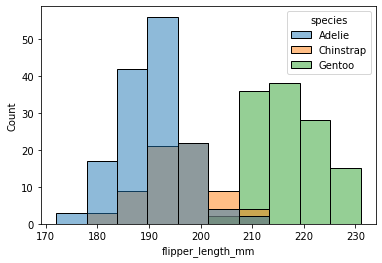

In [3]:
sns.histplot(data=df, x='flipper_length_mm', hue='species')

<AxesSubplot:xlabel='bill_depth_mm', ylabel='Count'>

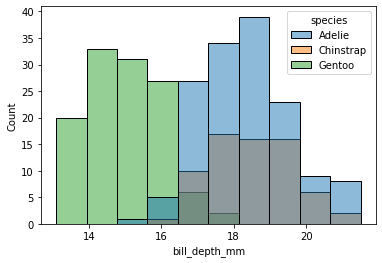

In [4]:
sns.histplot(data=df, x='bill_depth_mm', hue='species')

In [5]:
species_label = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
sex_label = {"Female" :0, "Male": 1}

df = df.replace({'species': species_label})
df = df.replace({"sex": sex_label})

In [6]:
X = df[['bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex']]
y = df['species']

In [7]:
X.sample(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
265,43.6,13.9,217.0,4900.0,0
81,42.9,17.6,196.0,4700.0,1
78,36.2,16.1,187.0,3550.0,0
16,38.7,19.0,195.0,3450.0,0
155,45.4,18.7,188.0,3525.0,0


In [8]:
y.sample(5)

209    1
140    0
48     0
294    2
342    2
Name: species, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(f'Length of training data: {len(X_train)}')
print(f'Length of testing data: {len(X_test)}')

Length of training data: 249
Length of testing data: 84


In [10]:
model = xgb.XGBClassifier(verbosity = 2)
model.fit(X_train, y_train)
print(); print(model)

[13:17:03] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 12 extra nodes, 0 pruned nodes, max_depth=4
[13:17:03] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 10 extra nodes, 0 pruned nodes, max_depth=4
[13:17:03] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updater_prune.cc:101: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[13:17:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:17:03] INFO: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\tree\updat

C:\Users\Hunain\anaconda3\envs\py37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [18]:
expected_y  = y_test
predicted_y = model.predict(X_test)

confusion_df = pd.DataFrame(confusion_arr, columns = ['Expected','Predicted'])
reverse_species_label = {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}
confusion_df = confusion_df.replace({'Expected': reverse_species_label, 'Predicted': reverse_species_label})
confusion_df = pd.crosstab(confusion_df['Expected'], confusion_df['Predicted'])

print(confusion_df)

Predicted  Adelie  Chinstrap  Gentoo
Expected                            
Adelie         29          1       0
Chinstrap       2         20       0
Gentoo          0          0      32


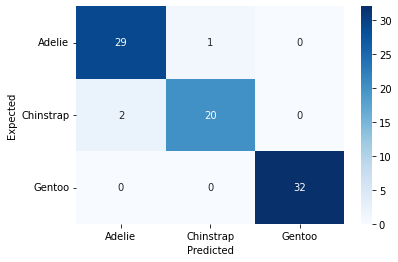

In [19]:
ax = sns.heatmap(confusion_df, annot=True, fmt='g', cmap='Blues')
plt.yticks(rotation=0) 
plt.show()
ax.clear()

In [21]:
model_accuracy = np.diag(confusion_df).sum() / confusion_df.to_numpy().sum()
print(f'Model accuracy: {model_accuracy*100:.2f}%')

Model accuracy: 96.43%
